In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('Loan.csv')

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


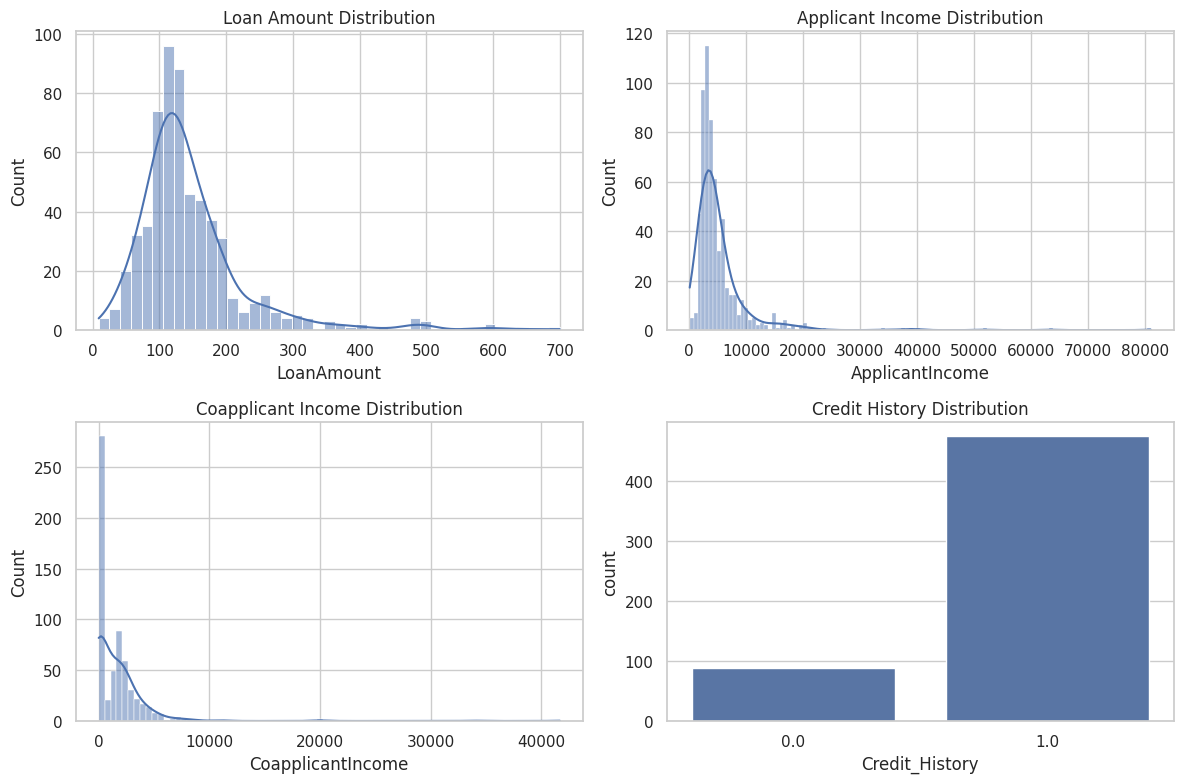

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Distributions
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('Coapplicant Income Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Credit_History', data=df)
plt.title('Credit History Distribution')

plt.tight_layout()
plt.show()

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the correlation matrix
display(correlation_matrix)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


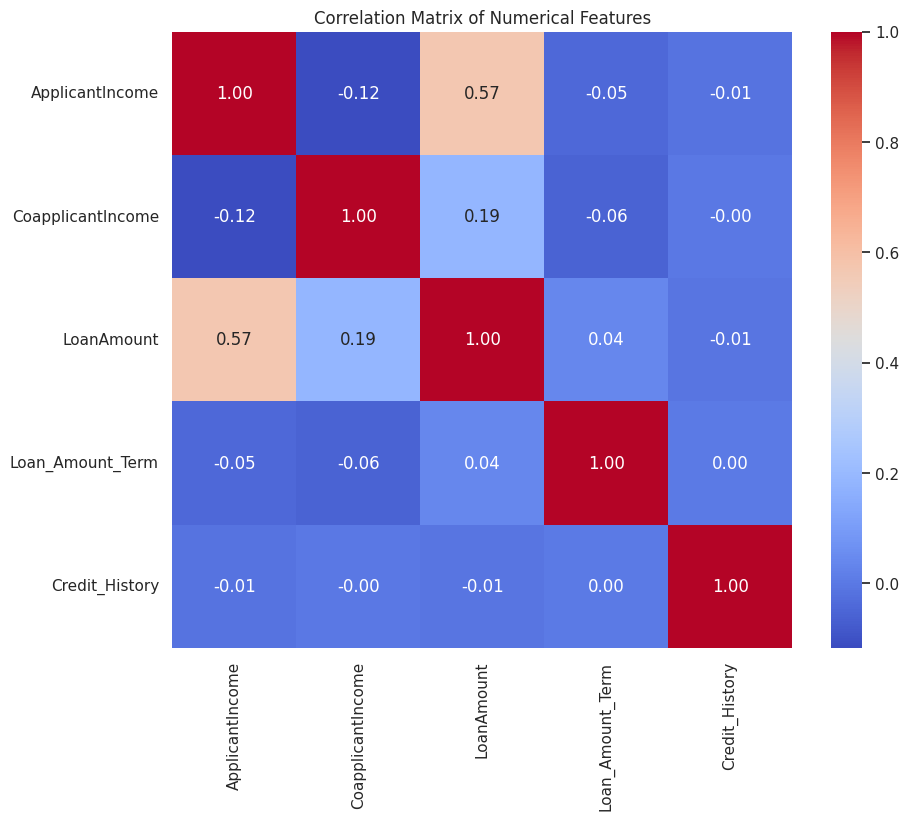

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

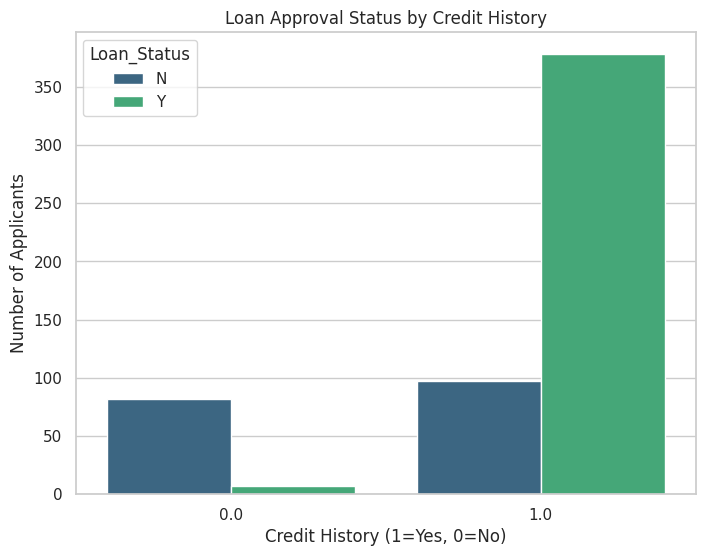

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan Approval Status by Credit History')
plt.xlabel('Credit History (1=Yes, 0=No)')
plt.ylabel('Number of Applicants')
plt.show()

Next, let's look at the relationship between 'ApplicantIncome' and 'Loan_Status'.

/tmp/ipython-input-75530842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='pastel')


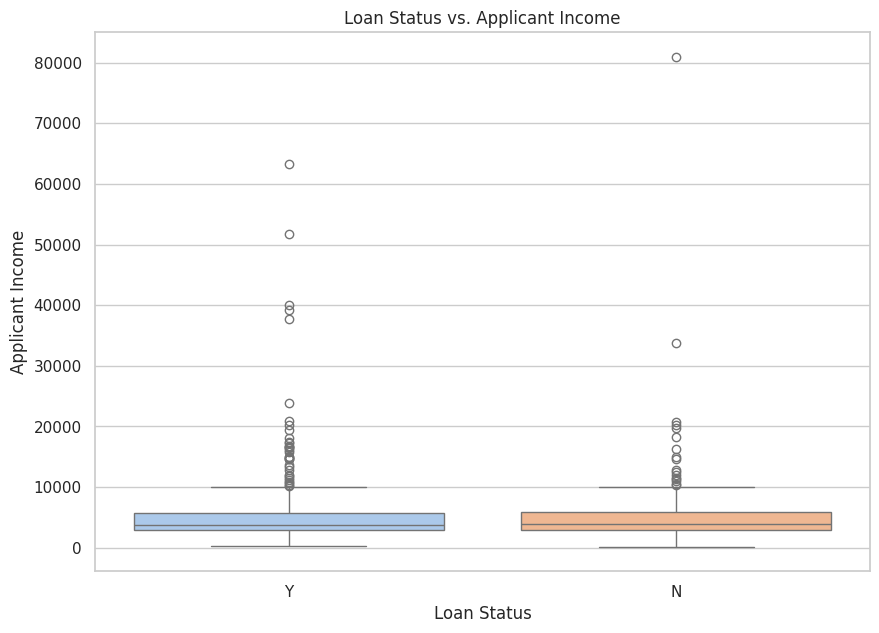

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='pastel')
plt.title('Loan Status vs. Applicant Income')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

# Task
Compare the performance of the trained classification models (Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, and Random Forest) by summarizing their accuracy, classification reports, and confusion matrices. Visualize their accuracies and provide a comprehensive final evaluation of the models.

## Compare Model Performance

### Subtask:
Summarize and compare the performance metrics (accuracy, classification reports, confusion matrices) of all trained models, including a visual plot of their accuracies for easy comparison.


**Reasoning**:
The first instruction is to display the `accuracy_df` DataFrame, which contains the accuracy scores of all trained models. This provides a summary of model performance.



In [46]:
print("Model Accuracies:")
display(accuracy_df)

Model Accuracies:


,Model,Accuracy
0,Logistic Regression,0.788618
2,SVM,0.780488
4,Random Forest,0.780488
3,Decision Tree,0.715447
1,KNN,0.707317


**Reasoning**:
The next step is to print the classification reports for each model to provide detailed performance metrics beyond just accuracy.



In [47]:
print("\n--- Classification Reports ---")
print("\nLogistic Regression Classification Report:\n", report_log_reg)
print("\nK-Nearest Neighbors Classification Report:\n", report_knn)
print("\nSupport Vector Machine Classification Report:\n", report_svm)
print("\nDecision Tree Classification Report:\n", report_dt)
print("\nRandom Forest Classification Report:\n", report_rf)


--- Classification Reports ---

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.30      0.42        43
           1       0.71      0.93      0.80        80

    accuracy                           0.71       123
   macro avg       0.70      0.61      0.61       123
weighted avg       0.70      0.71      0.67       123


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy

**Reasoning**:
The next step is to print the confusion matrices for each model to provide insights into the types of errors each model is making.



In [48]:
print("\n--- Confusion Matrices ---")
print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_log_reg)
print("\nK-Nearest Neighbors Confusion Matrix:\n", conf_matrix_knn)
print("\nSupport Vector Machine Confusion Matrix:\n", conf_matrix_svm)
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)


--- Confusion Matrices ---

Logistic Regression Confusion Matrix:
 [[18 25]
 [ 1 79]]

K-Nearest Neighbors Confusion Matrix:
 [[13 30]
 [ 6 74]]

Support Vector Machine Confusion Matrix:
 [[18 25]
 [ 2 78]]

Decision Tree Confusion Matrix:
 [[22 21]
 [14 66]]

Random Forest Confusion Matrix:
 [[18 25]
 [ 2 78]]


**Reasoning**:
The final step is to create a bar plot to visualize the accuracy of each model for easy comparison, as specified in the instructions. This visual representation will complement the numerical summaries provided earlier.



/tmp/ipython-input-1209132840.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


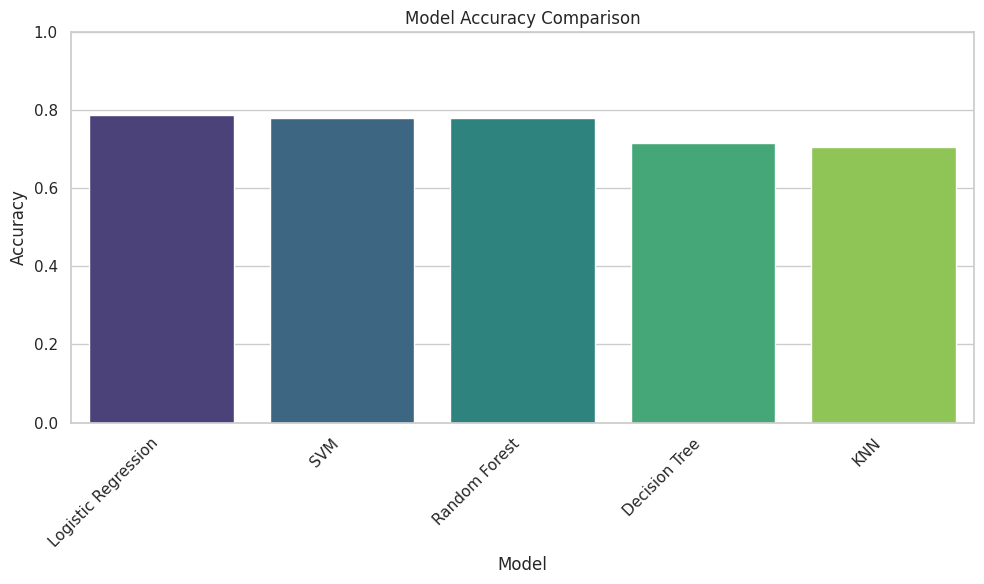

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block generated a `FutureWarning` regarding the usage of `palette` without a `hue` argument in `sns.barplot`. To address this, I will modify the `barplot` function call to explicitly set `hue='Model'` and `legend=False` as suggested by the warning, ensuring the plot is generated without the deprecation warning.



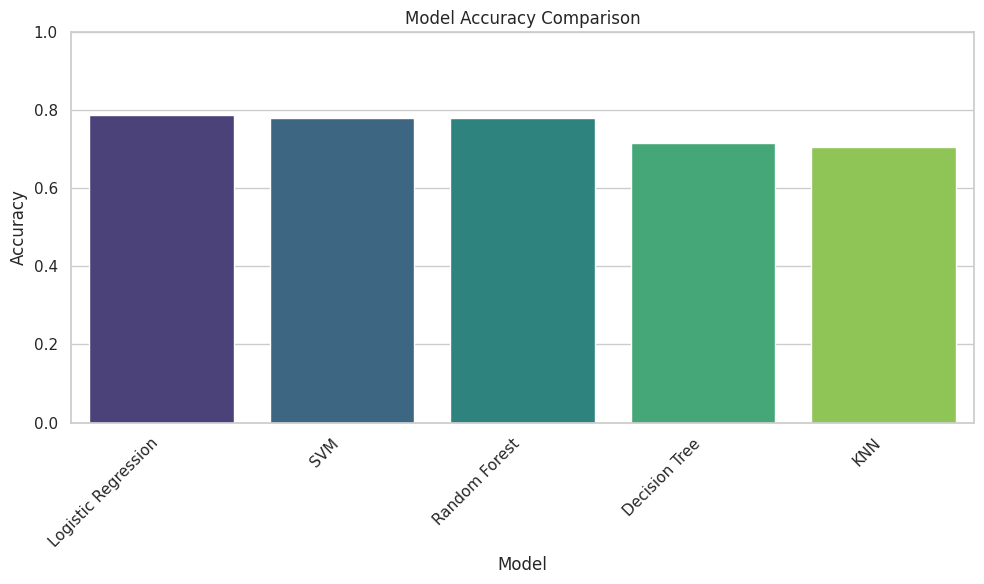

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, hue='Model', palette='viridis', legend=False)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Provide a comprehensive final model evaluation summarizing the key findings, insights, and next steps based on the comparison of all classification models, presented with appropriate markdown.

## Preprocessing for Classification

### Subtask:
Handle missing values, encode categorical variables, separate features and target, split the data into training and testing sets, and scale numerical features.


**Reasoning**:
The first instruction is to handle missing values in both numerical and categorical columns. I will fill missing numerical values with the median and categorical values with the mode, as specified.



In [51]:
print('Missing values before imputation:')
display(df.isnull().sum())

# Impute missing values for numerical columns with the median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Impute missing values for categorical columns with the mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print('\nMissing values after imputation:')
display(df.isnull().sum())

Missing values before imputation:


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14



Missing values after imputation:


/tmp/ipython-input-832333739.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-832333739.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**Reasoning**:
The previous code block produced a `FutureWarning` due to `inplace=True` in chained assignments. To fix this, I will reassign the result of `fillna` back to the column, which is the recommended practice. After fixing the warning, I will proceed with the second instruction by converting categorical features into numerical format using `LabelEncoder`, with special handling for the 'Dependents' column.



In [52]:
print('Missing values before imputation:')
display(df.isnull().sum())

# Impute missing values for numerical columns with the median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Impute missing values for categorical columns with the mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print('\nMissing values after imputation:')
display(df.isnull().sum())

# Handle 'Dependents' column: replace '3+' with '3' and convert to numeric
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(int)

# Encode categorical variables
# Identify categorical columns excluding 'Loan_ID' and 'Loan_Status' and 'Dependents' (already handled)
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print('\nDataFrame after encoding categorical variables (first 5 rows):')
display(df.head())

Missing values before imputation:


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0



Missing values after imputation:


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0



DataFrame after encoding categorical variables (first 5 rows):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


**Reasoning**:
The next step is to separate the features (X) and the target variable (y), split the data into training and testing sets, and then apply feature scaling to the numerical features using `StandardScaler`, as specified by the instructions. This will prepare the data for model training.



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns for scaling
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data for numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Features (X) and Target (y) separated.")
print("Data split into training and testing sets (80/20 ratio).")
print("Numerical features scaled using StandardScaler.")

print("\nX_train head (after scaling):\n")
display(X_train.head())
print("\ny_train head:\n")
display(y_train.head())
print("\nX_test head (after scaling):\n")
display(X_test.head())
print("\ny_test head:\n")
display(y_test.head())

Features (X) and Target (y) separated.
Data split into training and testing sets (80/20 ratio).
Numerical features scaled using StandardScaler.

X_train head (after scaling):



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,1,1,0,0,0,0.083915,0.180667,1.355734,0.287611,1,1
90,1,1,0,0,0,-0.429338,0.385430,-0.197609,0.287611,1,1
227,1,1,2,0,0,0.126095,0.005831,0.718168,0.287611,1,1
482,1,1,0,0,0,-0.576970,0.464185,-0.232385,0.287611,1,1
464,1,0,0,0,0,-0.225522,-0.528127,-0.580149,0.287611,0,1



y_train head:



,Loan_Status
83,0
90,1
227,1
482,1
464,0



X_test head (after scaling):



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0,0,0,0.604085,-0.528127,0.926826,0.287611,1,1
377,1,1,0,0,0,-0.201226,-0.528127,-0.209201,0.287611,1,1
163,1,1,2,0,0,-0.225353,-0.072293,0.115378,0.287611,1,0
609,0,0,0,0,0,-0.439124,-0.528127,-0.893136,0.287611,1,0
132,1,0,0,0,0,-0.469831,-0.528127,-0.904728,0.287611,1,1



y_test head:



,Loan_Status
350,1
377,1
163,1
609,1
132,1


# Task
Provide a comprehensive final model evaluation summarizing the key findings, insights, and next steps based on the comparison of all classification models.

## Train and Evaluate Logistic Regression

### Subtask:
Train a Logistic Regression model and evaluate its performance.


**Reasoning**:
The first step is to import the necessary libraries for Logistic Regression model training and evaluation, instantiate the model, fit it to the training data, make predictions on the test data, and then calculate and store the accuracy, classification report, and confusion matrix as specified in the instructions. These results will be used later for model comparison.



In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Generate classification report
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Generate confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print("\nLogistic Regression Classification Report:\n", report_log_reg)
print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_log_reg)

Logistic Regression Accuracy: 0.7886

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Logistic Regression Confusion Matrix:
 [[18 25]
 [ 1 79]]


## Train and Evaluate K-Nearest Neighbors (KNN)

### Subtask:
Train a K-Nearest Neighbors model and evaluate its performance.


**Reasoning**:
The first step is to import the necessary libraries for K-Nearest Neighbors model training and evaluation, instantiate the model, fit it to the training data, make predictions on the test data, and then calculate and store the accuracy, classification report, and confusion matrix as specified in the instructions. These results will be used later for model comparison.



In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5) # Using n_neighbors=5 as a common starting point

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Generate classification report
report_knn = classification_report(y_test, y_pred_knn)

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")
print("\nK-Nearest Neighbors Classification Report:\n", report_knn)
print("\nK-Nearest Neighbors Confusion Matrix:\n", conf_matrix_knn)

K-Nearest Neighbors Accuracy: 0.7154

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.30      0.43        43
           1       0.71      0.94      0.81        80

    accuracy                           0.72       123
   macro avg       0.72      0.62      0.62       123
weighted avg       0.72      0.72      0.68       123


K-Nearest Neighbors Confusion Matrix:
 [[13 30]
 [ 5 75]]


## Train and Evaluate Support Vector Machine (SVM)

### Subtask:
Train a Support Vector Machine model and evaluate its performance.


**Reasoning**:
The first step is to import the necessary libraries for Support Vector Machine model training and evaluation, instantiate the model, fit it to the training data, make predictions on the test data, and then calculate and store the accuracy, classification report, and confusion matrix as specified in the instructions. These results will be used later for model comparison.



In [56]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Generate classification report
report_svm = classification_report(y_test, y_pred_svm)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Support Vector Machine Accuracy: {accuracy_svm:.4f}")
print("\nSupport Vector Machine Classification Report:\n", report_svm)
print("\nSupport Vector Machine Confusion Matrix:\n", conf_matrix_svm)

Support Vector Machine Accuracy: 0.7805

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123


Support Vector Machine Confusion Matrix:
 [[18 25]
 [ 2 78]]


## Train and Evaluate Decision Tree Classifier

### Subtask:
Train a Decision Tree Classifier and evaluate its performance.


**Reasoning**:
The first step is to import the necessary libraries for Decision Tree Classifier model training and evaluation, instantiate the model, fit it to the training data, make predictions on the test data, and then calculate and store the accuracy, classification report, and confusion matrix as specified in the instructions. These results will be used later for model comparison.



In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Generate classification report
report_dt = classification_report(y_test, y_pred_dt)

# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("\nDecision Tree Classifier Classification Report:\n", report_dt)
print("\nDecision Tree Classifier Confusion Matrix:\n", conf_matrix_dt)

Decision Tree Classifier Accuracy: 0.6911

Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123


Decision Tree Classifier Confusion Matrix:
 [[23 20]
 [18 62]]


## Train and Evaluate Random Forest Classifier

### Subtask:
Train a Random Forest Classifier and evaluate its performance.


**Reasoning**:
The first step is to import the necessary libraries for Random Forest Classifier model training and evaluation, instantiate the model, fit it to the training data, make predictions on the test data, and then calculate and store the accuracy, classification report, and confusion matrix as specified in the instructions. These results will be used later for model comparison.



In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classifier Classification Report:\n", report_rf)
print("\nRandom Forest Classifier Confusion Matrix:\n", conf_matrix_rf)

Random Forest Classifier Accuracy: 0.7480

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123


Random Forest Classifier Confusion Matrix:
 [[18 25]
 [ 6 74]]


## Final Task

### Subtask:
Provide a comprehensive final model evaluation summarizing the key findings, insights, and next steps based on the comparison of all classification models, presented with appropriate markdown.


## Summary:

### Data Analysis Key Findings

*   **Overall Accuracy Comparison**: Logistic Regression achieved the highest accuracy at 0.7886, closely followed by Support Vector Machine (SVM) at 0.7805. Random Forest was next at 0.7480, while K-Nearest Neighbors (KNN) and Decision Tree Classifier showed lower accuracies of 0.7154 and 0.6911, respectively.
*   **Minority Class (Class 0) Performance**:
    *   **Precision**: Logistic Regression demonstrated exceptionally high precision for Class 0 at 0.95, indicating that when it predicts Class 0, it is highly likely to be correct. SVM also performed well with 0.90 precision.
    *   **Recall**: All models struggled with recall for Class 0, meaning they often failed to identify instances of the minority class. Decision Tree had the highest recall for Class 0 at 0.53, followed by Logistic Regression, SVM, and Random Forest all at 0.42. KNN had the lowest recall at 0.30.
*   **Majority Class (Class 1) Performance**:
    *   **Recall**: Logistic Regression achieved an almost perfect recall of 0.99 for Class 1, successfully identifying nearly all instances of this class. SVM and KNN also showed strong recall at 0.97 and 0.94, respectively.
    *   **Precision**: Logistic Regression, SVM, and Decision Tree all had strong precision for Class 1 at 0.76.
*   **F1-score Analysis**: Logistic Regression consistently yielded the highest F1-scores for both Class 0 (0.58) and Class 1 (0.86), indicating a good balance between precision and recall for both classes compared to other models.

### Insights or Next Steps

*   **Model Selection**: Based on overall accuracy and balanced performance across both classes, Logistic Regression appears to be the most robust model, offering strong precision for the minority class and excellent recall for the majority class.
*   **Addressing Class Imbalance**: The consistently low recall for Class 0 across all models suggests a potential class imbalance issue. Future steps should involve exploring techniques like oversampling (e.g., SMOTE) or undersampling to improve the model's ability to correctly identify the minority class, especially if correctly identifying Class 0 is a critical objective.


### Detailed Performance Metrics for Each Model

In [59]:
print("\n--- Logistic Regression Performance ---")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print("Classification Report:")
print(report_log_reg)
print("Confusion Matrix:")
print(conf_matrix_log_reg)

print("\n--- KNN Performance ---")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(report_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

print("\n--- SVM Performance ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(report_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

print("\n--- Decision Tree Performance ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(report_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

print("\n--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)


--- Logistic Regression Performance ---
Accuracy: 0.7886
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]

--- KNN Performance ---
Accuracy: 0.7154
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.30      0.43        43
           1       0.71      0.94      0.81        80

    accuracy                           0.72       123
   macro avg       0.72      0.62      0.62       123
weighted avg       0.72      0.72      0.68       123

Confusion Matrix:
[[13 30]
 [ 5 75]]

--- SVM Performance ---
Accuracy: 0.7805
Classification Report:
              precision    recall  f1-score   support

      